# 06 - Árboles de decisión

![](images/portada_nb_FAV.png)

## Módulo 6 - Aprendizaje de máquina supervisado
### Profesor: M.Sc. Favio Vázquez

In [1]:
from imports import *

In [2]:
!pip install graphviz

In [3]:
!pip install pydot

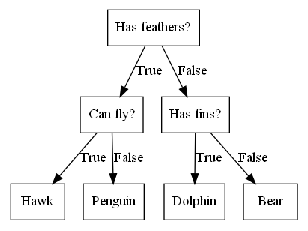

In [4]:
mglearn.plots.plot_animal_tree()

## Construcción de un árbol de decisión

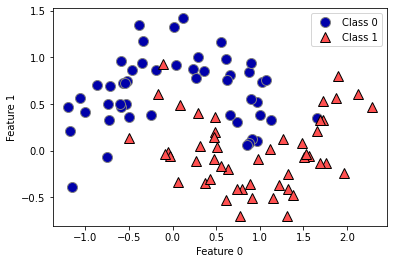

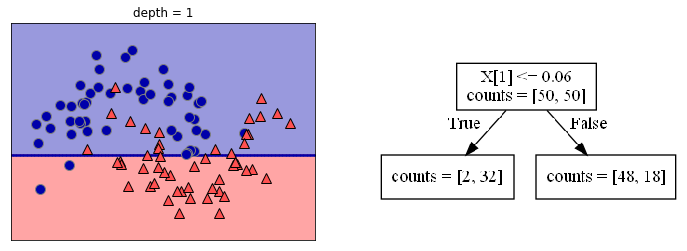

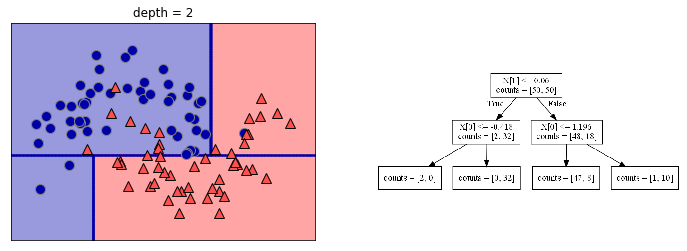

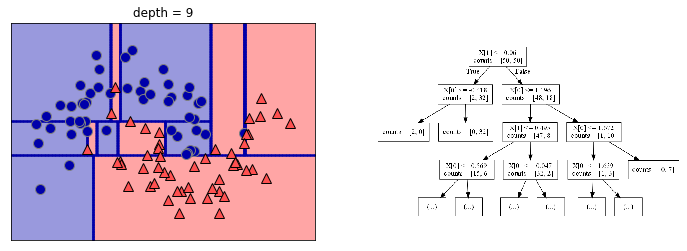

In [5]:
mglearn.plots.plot_tree_progressive()

Los árboles de decisión son propensos al sobreajuste

## Ejemplo (Árboles de clasificación)

In [6]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split

In [7]:
df = load_breast_cancer()

In [8]:
df

{'data': array([[ 17.99 ,  10.38 , 122.8  , ...,   0.265,   0.46 ,   0.119],
        [ 20.57 ,  17.77 , 132.9  , ...,   0.186,   0.275,   0.089],
        [ 19.69 ,  21.25 , 130.   , ...,   0.243,   0.361,   0.088],
        ...,
        [ 16.6  ,  28.08 , 108.3  , ...,   0.142,   0.222,   0.078],
        [ 20.6  ,  29.33 , 140.1  , ...,   0.265,   0.409,   0.124],
        [  7.76 ,  24.54 ,  47.92 , ...,   0.   ,   0.287,   0.07 ]]),
 'target': array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
        0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
        1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
        1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
        1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0,
        0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 0, 1, 1, 1, 1, 0, 0, 

In [9]:
type(df)

sklearn.utils.Bunch

In [10]:
df.feature_names # Variables

array(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error',
       'fractal dimension error', 'worst radius', 'worst texture',
       'worst perimeter', 'worst area', 'worst smoothness',
       'worst compactness', 'worst concavity', 'worst concave points',
       'worst symmetry', 'worst fractal dimension'], dtype='<U23')

In [11]:
len(df.feature_names)

30

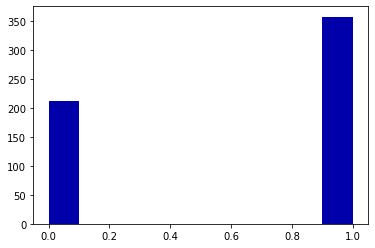

In [12]:
plt.hist(df.target)
plt.show()

In [13]:
X_train, X_test, y_train, y_test = train_test_split(df.data, df.target, stratify=df.target, random_state=42)

In [14]:
tree = DecisionTreeClassifier(random_state=0)

In [15]:
tree.fit(X_train,y_train)

DecisionTreeClassifier(random_state=0)

In [16]:
tree.get_depth()

7

In [17]:
# Training
tree.score(X_train, y_train)

1.0

In [18]:
# Test
tree.score(X_test, y_test)

0.9370629370629371

In [19]:
# Árbol restringido
tree_ad = DecisionTreeClassifier(max_depth=4,random_state=0)
tree_ad.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=4, random_state=0)

In [20]:
# Training
tree_ad.score(X_train, y_train)

0.9882629107981221

In [21]:
# Test
tree_ad.score(X_test, y_test)

0.951048951048951

In [22]:
from sklearn.tree import export_graphviz
export_graphviz(tree_ad, out_file="tree.dot", class_names=["maligno","beningno"],
                feature_names=df.feature_names, impurity=True,filled=True)

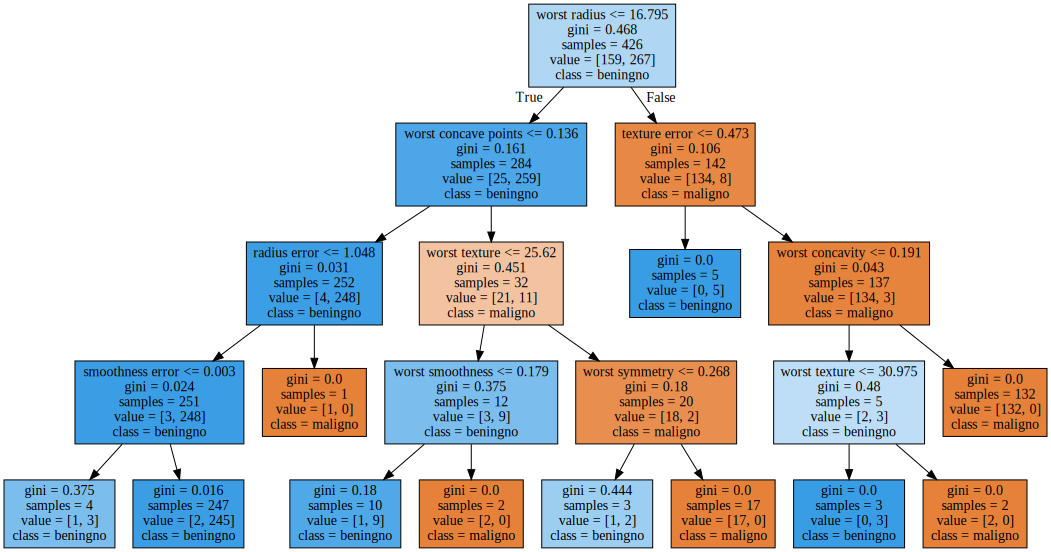

In [23]:
import graphviz

with open("tree.dot") as f:
    dot_graph = f.read()
display(graphviz.Source(dot_graph))

In [24]:
# Feature importance
tree_ad.feature_importances_

array([0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   ,
       0.   , 0.01 , 0.048, 0.   , 0.   , 0.002, 0.   , 0.   , 0.   ,
       0.   , 0.   , 0.727, 0.046, 0.   , 0.   , 0.014, 0.   , 0.018,
       0.122, 0.012, 0.   ])

In [25]:
def plot_feature_importance(model):
    n_features = df.data.shape[1]
    plt.barh(range(n_features), model.feature_importances_, align="center")
    plt.yticks(np.arange(n_features), df.feature_names)
    plt.xlabel("Importancia de las variables")
    plt.ylabel("Característica")
    plt.ylim(-1,n_features)
    plt.show()

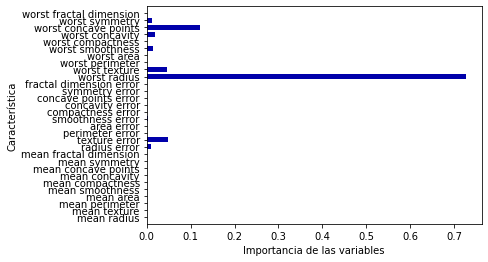

In [26]:
plot_feature_importance(tree_ad) #debe sumar 1

## Árboles de decisión para regresión

In [27]:
prices = pd.read_csv("data/precios.csv")

In [28]:
prices.head()

,Unnamed: 0,date,price
0,0,1957.0,4.11e+08
1,1,1959.0,6.79e+07
2,2,1960.0,5.24e+06
3,3,1965.0,2.64e+06
4,4,1970.0,7.34e+05


In [29]:
prices.drop("Unnamed: 0", axis=1, inplace=True)

In [30]:
prices.head()

,date,price
0,1957.0,4.11e+08
1,1959.0,6.79e+07
2,1960.0,5.24e+06
3,1965.0,2.64e+06
4,1970.0,7.34e+05


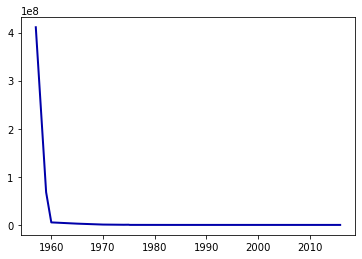

In [31]:
plt.plot(prices.date, prices.price)

Text(0, 0.5, 'Precio en $/MByte')

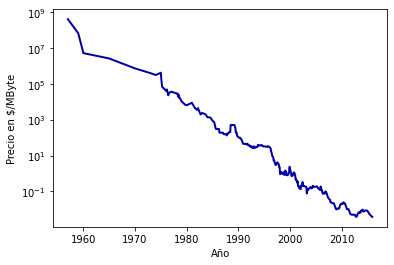

In [32]:
plt.semilogy(prices.date, prices.price)
plt.xlabel("Año") 
plt.ylabel("Precio en $/MByte")

In [33]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression

In [34]:
data_train = prices[prices.date < 2000]
data_test = prices[prices.date >= 2000]

In [35]:
X_train = data_train.date[:, np.newaxis]

In [36]:
y_train = np.log(data_train.price)

In [37]:
tree = DecisionTreeRegressor().fit(X_train,y_train)
lr = LinearRegression().fit(X_train,y_train)

In [38]:
X_all = prices.date[:,np.newaxis]

pred_tree = tree.predict(X_all)
pred_lr = lr.predict(X_all)

In [39]:
price_tree = np.exp(pred_tree)
price_lr = np.exp(pred_lr)

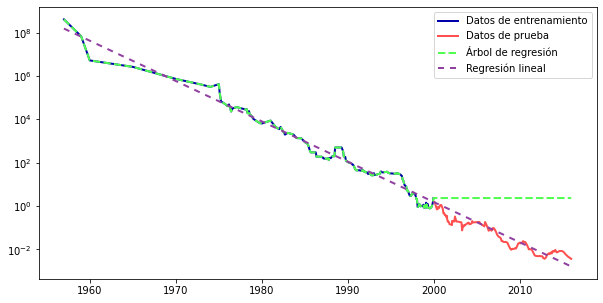

In [40]:
plt.figure(figsize=(10,5))
plt.semilogy(data_train.date, data_train.price, label="Datos de entrenamiento")
plt.semilogy(data_test.date, data_test.price, label="Datos de prueba")
plt.semilogy(prices.date, price_tree, label="Árbol de regresión")
plt.semilogy(prices.date, price_lr, label="Regresión lineal")
plt.legend()